# **Capstone Project 2: Supermarket Customer Data Analysis**

# **1.1. Latar Belakang**

Dalam dunia ritel yang sangat kompetitif, pemahaman mendalam terhadap perilaku konsumen merupakan faktor kunci untuk meningkatkan penjualan dan loyalitas pelanggan. Supermarket sebagai salah satu bentuk ritel modern menyediakan berbagai kategori produk yang dapat dibeli oleh beragam segmen pelanggan. Namun, tidak semua produk mendapatkan respon yang sama dari pelanggan.

Melalui analisis data pelanggan, perusahaan dapat mengidentifikasi produk-produk yang paling diminati dan memahami karakteristik pelanggan yang membeli produk tersebut. Informasi ini sangat penting untuk menentukan strategi promosi, pengelolaan stok, dan pendekatan pemasaran yang lebih terfokus.

# **1.2. Pernyataan Masalah**

Supermarket modern menghadapi tantangan untuk terus memahami pola konsumsi pelanggan yang terus berubah. Banyaknya kategori produk yang ditawarkan tidak menjamin semua produk tersebut memperoleh perhatian yang sama dari konsumen. Tanpa pemahaman yang akurat mengenai kategori produk yang paling diminati dan siapa saja konsumen utamanya, perusahaan akan kesulitan dalam menyusun strategi pemasaran dan pengelolaan stok yang efektif. Oleh karena itu, diperlukan analisis mendalam terhadap data pelanggan guna menjawab beberapa pertanyaan penting berikut:

1. Kategori produk apa yang paling banyak dibeli pelanggan dalam dua tahun terakhir?

2. Siapa pelanggan utama dari masing-masing kategori produk, ditinjau dari demografi seperti gender, status pernikahan, dan pendapatan?

3. Apakah terdapat perbedaan minat terhadap produk tertentu berdasarkan saluran pembelian (website, katalog, atau toko fisik)?

4. Bagaimana tingkat respons pelanggan terhadap kampanye promosi pada berbagai kategori produk?

# **1.3 Tujuan**

Agar sebuah perusahaan dapat mengambil keputusan yang efektif dan berbasis data, maka setiap analisis harus memiliki tujuan yang jelas dan terarah. Dalam konteks analisis pelanggan supermarket ini, tujuan utama adalah menggali informasi penting yang dapat membantu manajemen memahami kecenderungan pembelian pelanggan dan memetakan strategi penjualan yang lebih tepat sasaran. Analisis ini diharapkan tidak hanya memberikan gambaran umum, tetapi juga menghasilkan rekomendasi yang dapat langsung diimplementasikan.

Secara khusus, tujuan dari proyek ini adalah:

1. Mengidentifikasi kategori produk yang paling diminati pelanggan berdasarkan jumlah dan nilai pembelian selama dua tahun terakhir.

2. Menganalisis profil pelanggan utama dari setiap kategori produk, dengan memperhatikan faktor seperti usia, gender, status keluarga, dan tingkat pendapatan.

3. Menentukan saluran pembelian yang paling efektif untuk masing-masing kategori produk.

4. Memberikan rekomendasi strategi pemasaran dan promosi yang sesuai dengan karakteristik pelanggan dan preferensi pembelian mereka.

# **2. Data Processing**

Dataset Supermarket Customers berisi data transaksi pelanggan dari sebuah atau beberapa gerai supermarket. Data ini mencerminkan interaksi langsung antara pelanggan dan layanan/toko, dengan pendekatan Business to Consumer (B2C). Dataset ini dapat digunakan untuk menganalisis perilaku pelanggan, preferensi pembelian, hingga segmentasi pasar.

**Import Library**

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

## 2.1. DATA UNDERSTANDING

Sebelum melangkah ke tahap analisis yang lebih lanjut, langkah pertama yang perlu dilakukan adalah memahami struktur dan isi dari dataset melalui proses data understanding. Tahap ini bertujuan untuk memperoleh gambaran menyeluruh mengenai karakteristik data yang tersedia, termasuk jenis variabel, distribusi nilai, serta potensi masalah yang mungkin terdapat di dalamnya.

Dalam proses eksplorasi awal ini, kita dapat mengidentifikasi berbagai anomali atau ketidakwajaran dalam data, seperti nilai yang hilang (missing values), entri duplikat, atau outlier. Berdasarkan hasil pemeriksaan awal terhadap dataset Supermarket Customers, ditemukan bahwa missing values terdapat pada kolom income (pendapatan pelanggan). Keberadaan nilai yang hilang ini perlu ditangani secara tepat agar tidak mengganggu validitas hasil analisis.

Penanganan terhadap anomali seperti missing values akan dilakukan pada tahap data cleaning, yaitu proses pembersihan dan penyesuaian data agar siap untuk dianalisis lebih lanjut. Setiap tindakan korektif akan didasarkan pada pertimbangan yang logis, baik melalui pemahaman terhadap konteks bisnis (domain knowledge) maupun dengan menggunakan teknik statistik yang sesuai.

Sebagai langkah awal dalam eksplorasi data, fokus awal akan diarahkan pada evaluasi variabel usia pelanggan. Usia merupakan salah satu variabel penting karena dapat memberikan wawasan yang berguna dalam segmentasi pelanggan serta pemahaman terhadap perilaku konsumen.

In [100]:
# Import dataset
df = pd.read_csv(
    'Supermarket Customers.csv',
    sep=';',
    na_values=['', ' ', 'NA', 'NaN', 'n/a']
)
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15/10/2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [101]:
# Melihat nama-nama kolom beserta tipe data dan jumlah value Non-Null
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

Dataset ini berisi informasi detail tentang pelanggan dari sebuah perusahaan retail. Informasi mencakup data demografis, status keluarga, pendidikan, pendapatan, preferensi produk, serta interaksi pelanggan terhadap berbagai saluran penjualan dan promosi. Dataset ini sangat berguna untuk menganalisis perilaku konsumen, merancang segmentasi pelanggan, serta mengevaluasi efektivitas kampanye pemasaran.

Terdapat 29 kolom dalam dataset Supermarket Customers, yaitu:

📌 Keterangan Kolom
1. `ID` : ID unik untuk setiap pelanggan

2. `Year_Birth` : Tahun kelahiran pelanggan

3. `Education` : Tingkat pendidikan terakhir yang diselesaikan

4. `Marital_Status` : Status pernikahan pelanggan

5. `Income` : Pendapatan tahunan rumah tangga pelanggan

6. `Kidhome` : Jumlah anak kecil (balita) di rumah

7. `Teenhome` : Jumlah remaja di rumah

8. `Dt_Customer` : Tanggal ketika pelanggan menjadi anggota

9. `Recency` : Jumlah hari sejak pembelian terakhir

10. `MntWines` : Total pengeluaran untuk produk wine dalam 2 tahun terakhir

11. `MntFruits` : Total pengeluaran untuk produk buah

12. `MntMeatProducts` : Total pengeluaran untuk produk daging

13. `MntFishProducts` : Total pengeluaran untuk produk ikan

14. `MntSweetProducts` : Total pengeluaran untuk produk manis (snack, dessert)

15. `MntGoldProds` : Total pengeluaran untuk produk emas atau aksesori mewah

16. `NumDealsPurchases` : Jumlah pembelian dengan memanfaatkan diskon atau promo

17. `NumWebPurchases` : Jumlah pembelian melalui situs web perusahaan

18. `NumCatalogPurchases` : Jumlah pembelian menggunakan katalog

19. `NumStorePurchases` : Jumlah pembelian langsung di toko fisik

20. `NumWebVisitsMonth` : Frekuensi kunjungan ke website dalam satu bulan terakhir

21. `AcceptedCmp1` : Apakah pelanggan menerima tawaran pada kampanye promosi ke-1 (1 = ya, 0 = tidak)

22. `AcceptedCmp2` : Apakah pelanggan menerima tawaran pada kampanye promosi ke-2

23. `AcceptedCmp3` : Apakah pelanggan menerima tawaran pada kampanye promosi ke-3

24. `AcceptedCmp4` : Apakah pelanggan menerima tawaran pada kampanye promosi ke-4

25. `AcceptedCmp5` : Apakah pelanggan menerima tawaran pada kampanye promosi ke-5

26. `Complain` : Apakah pelanggan pernah mengajukan komplain dalam 2 tahun terakhir (1 = ya, 0 = tidak)

27. `Z_CostContact` : Variabel buatan (dummy), bernilai konstan untuk semua pelanggan

28. `Z_Revenue` : Variabel buatan (dummy), bernilai konstan untuk semua pelanggan

29. `Response` : Apakah pelanggan menerima tawaran dari kampanye promosi terakhir (1 = ya, 0 = tidak)

Berikut 5 baris teratas dan terbawah dari dataset Supermarket Customers.


In [102]:
#Mencari tahu nama kolom, jumlah unique value, dan unique value
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04/09/2012, 08/03/2014, 21/08/2013, 10/02/2014, 19/01/2014, 09/09/2013, 13/11/2012, 08/05/2013, 06/06/2013, 13/03/2014, 15/11/2013, 10/10/2012, 24/11/2012, 24/12/2012, 31/08/2012, 28/03/2013, 03/11/2012, 08/08/2012, 06/01/2013, 23/12/2012, 11/01/2014, 18/03/2013, 02/01/2013, 27/05/2013, 20/02/2013, 31/05/2013, 22/11/2013, 22/05/2014, 11/05/2013, 29/10/2012, 29/08/2013, 31/12/2013, 02/09/2013, 11/02/2014, 01/02/2013, 29/04/2013, 12/03/2013, 05/11/2013, 02/10/2013, 28/06/2014, 09/11/2012, 24/05/2013, 01/01/2014, 08/11/2012, 12/05/2014, 11/08/2012, 07/06/2014, 12/06/2013, 19/11/2012, 02/04/2013, 28/04/2014, 17/06/2013, 03/03/2014, 04/07/2013, 07/09/2012, 18/02/2013, 11/06/2013, 06/12/2013, 21/05/2013, 11/05/2014, 19/03/2014, 27/09/2013, 08/04/2013, 11/09/2012, 14/09/2012, 17/03/2013, 05/04/2013, 30/04/2014, 19/12/2012, 27/08/2012, 12/10/2012, 04/09/2013, 29/08/2012, 23/06/2013, 03/07/2013, 25/02/2014, 11/08/2013, 16/07/2013, 28/05/2014, 21/01/2014, 27/05/2014, 23/11/2013, 23/03/2014, 24/05/2014, 22/11/2012, 11/04/2013, 01/12/2013, 20/06/2013, 23/07/2013, 30/03/2014, 20/04/2013, 17/05/2013, 08/05/2014, 10/12/2013, 24/09/2013, 02/02/2013, 07/12/2012, 02/11/2013, 10/11/2012, 25/06/2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

**TEMUAN**

    Berdasarkan hasil analisis pada tahap Data Understanding, ditemukan beberapa hal yang perlu diperhatikan dan ditindaklanjuti untuk mengoptimalkan proses analisis data. Adapun temuan-temuan tersebut adalah sebagai berikut:<br>

1. `Kolom "Education"`
    Ditemukan beberapa nilai (value) yang memiliki arti serupa namun dituliskan berbeda, seperti:
        "2n Cycle" dan "Master"
        "Graduation" dan "Bachelor"
    Penyamaan istilah ini diperlukan agar analisis kategori menjadi lebih konsisten dan tidak menimbulkan bias akibat redundansi data.

2. `Kolom "Marital_Status"`
    Terdapat beberapa nilai yang tidak relevan atau tidak sesuai dengan definisi status pernikahan, seperti:
    **"Alone", "Absurd", dan "YOLO"**
    Nilai-nilai ini dapat mengganggu akurasi segmentasi pelanggan dan sebaiknya dikategorikan ulang atau disesuaikan.

3. `Kolom "Dt_Customer"`
    Format data masih berupa object/string, padahal seharusnya berupa tipe tanggal (datetime) agar dapat digunakan untuk menghitung durasi keanggotaan pelanggan dengan akurat.

4. `Kolom "Response"`
    Nama kolom ini berpotensi membingungkan karena tidak langsung menjelaskan maknanya. Selain itu, penulisan "Respose" (jika itu typo) perlu dikoreksi. Disarankan mengganti nama menjadi AcceptedCmp6 untuk memperjelas konteks isinya (0 = tidak menerima, 1 = menerima).

5. `Kolom "Z_CostContact" dan "Z_Revenue"`
    Kedua kolom ini tidak memiliki deskripsi yang jelas dalam dokumen data dictionary. Nilainya tampak seragam dan tidak dapat diinterpretasikan, sehingga besar kemungkinan merupakan kolom dummy atau placeholder yang tidak relevan untuk analisis dan dapat dipertimbangkan untuk dihapus.

## 2.2. DATA REFORMATTING

In [103]:
# Merapikan kolom education
df['Education']=df['Education'].replace({'2n Cycle':'Master', 'Graduation':'Bachelor'})

In [104]:
# Melihat unique value kolom Marital_Status
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [105]:
# Melihat jumlah value 'Absurd', 'YOLO'
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [106]:
# Menghapus data pelanggan dengan Marital_Status 'Absurd' dan 'YOLO'
df = df.drop(df[(df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')].index)
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

In [107]:
# Merapikan value pada kolom Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [108]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d/%m/%Y')
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [109]:
# Mengubah nama kolom Response menjadi AcceptedCmp6
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace= True)

In [117]:
#Membuat kolom Age
df['Age']=(df['Dt_Customer'].dt.year-df['Year_Birth'])

In [120]:
# Mengubah urutan kolom
df = df [['ID', 'Dt_Customer', 'Age', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Income', 'Recency', 'MntGoldProds', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'Complain']].reset_index()
df

,index,ID,Dt_Customer,Age,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Income,...,NumStorePurchases,NumCatalogPurchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain
0,0,5524,2012-09-04,55,1957,Bachelor,Single,0,0,58138.0,...,4,10,3,0,0,0,0,0,1,0
1,1,2174,2014-03-08,60,1954,Bachelor,Single,1,1,46344.0,...,2,1,2,0,0,0,0,0,0,0
2,2,4141,2013-08-21,48,1965,Bachelor,Together,0,0,71613.0,...,10,2,1,0,0,0,0,0,0,0
3,3,6182,2014-02-10,30,1984,Bachelor,Together,1,0,26646.0,...,4,0,2,0,0,0,0,0,0,0
4,4,5324,2014-01-19,33,1981,PhD,Married,1,0,58293.0,...,6,3,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2231,10870,2013-06-13,46,1967,Bachelor,Married,0,1,61223.0,...,4,3,2,0,0,0,0,0,0,0
2232,2232,4001,2014-06-10,68,1946,PhD,Together,2,1,64014.0,...,5,2,7,1,0,0,0,0,0,0
2233,2233,7270,2014-01-25,33,1981,Bachelor,Divorced,0,0,56981.0,...,13,3,1,0,0,0,1,0,0,0
2234,2234,8235,2014-01-24,58,1956,Master,Together,0,1,69245.0,...,10,5,2,0,0,0,0,0,0,0


## 2.3. MISSING VALUE

In [110]:
# Menampilkan jumlah data missing pada setiap kolom
pd.DataFrame(data = df.isna().sum(),
            columns = ['Missing Values'])

,Missing Values
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [121]:
# Melihat data pelanggan dengan income NaN
df[df['Income'].isna()]

,index,ID,Dt_Customer,Age,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Income,...,NumStorePurchases,NumCatalogPurchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain
10,10,1994,2013-11-15,30,1983,Bachelor,Married,1,0,NaN,...,2,0,1,0,0,0,0,0,0,0
27,27,5255,2013-02-20,27,1986,Bachelor,Single,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
43,43,7281,2013-11-05,54,1959,PhD,Single,0,0,NaN,...,4,3,1,0,0,0,0,0,0,0
48,48,7244,2014-01-01,63,1951,Bachelor,Single,2,1,NaN,...,4,1,3,0,0,0,0,0,0,0
58,58,8557,2013-06-17,31,1982,Bachelor,Single,1,0,NaN,...,3,0,2,0,0,0,0,0,0,0
71,71,10629,2012-09-14,39,1973,Master,Married,1,0,NaN,...,3,0,3,0,0,0,0,0,0,0
90,90,8996,2012-11-19,55,1957,PhD,Married,2,1,NaN,...,8,2,12,0,0,0,0,0,0,0
91,91,9235,2014-05-27,57,1957,Bachelor,Single,1,1,NaN,...,2,0,1,0,0,0,0,0,0,0
92,92,5798,2013-11-23,40,1973,Master,Together,0,0,NaN,...,8,4,1,0,0,0,0,0,0,0
128,128,8268,2013-07-11,52,1961,PhD,Married,0,1,NaN,...,7,1,3,0,0,0,0,0,0,0


In [122]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

index                  0.000000
ID                     0.000000
Dt_Customer            0.000000
Age                    0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Kidhome                0.000000
Teenhome               0.000000
Income                 1.073345
Recency                0.000000
MntGoldProds           0.000000
MntWines               0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntFruits              0.000000
MntSweetProducts       0.000000
NumWebVisitsMonth      0.000000
NumWebPurchases        0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumDealsPurchases      0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp6           0.000000
Complain               0.000000
dtype: float64

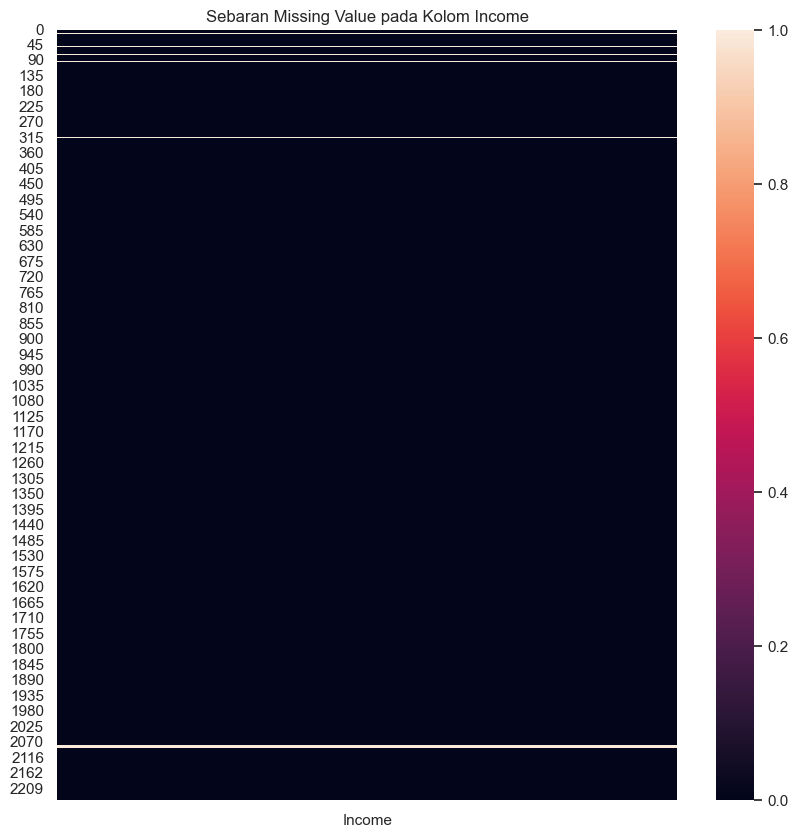

In [113]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Income']].isna()) 
plt.title('Sebaran Missing Value pada Kolom Income')
plt.show()

In [132]:
# Menghapus data pelanggan dengan income NaN
df.dropna(subset=['Income'],inplace=True)
df

,index,ID,Dt_Customer,Age,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Income,...,NumStorePurchases,NumCatalogPurchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain
0,0,5524,2012-09-04,55,1957,Bachelor,Single,0,0,58138.0,...,4,10,3,0,0,0,0,0,1,0
1,1,2174,2014-03-08,60,1954,Bachelor,Single,1,1,46344.0,...,2,1,2,0,0,0,0,0,0,0
2,2,4141,2013-08-21,48,1965,Bachelor,Together,0,0,71613.0,...,10,2,1,0,0,0,0,0,0,0
3,3,6182,2014-02-10,30,1984,Bachelor,Together,1,0,26646.0,...,4,0,2,0,0,0,0,0,0,0
4,4,5324,2014-01-19,33,1981,PhD,Married,1,0,58293.0,...,6,3,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2231,10870,2013-06-13,46,1967,Bachelor,Married,0,1,61223.0,...,4,3,2,0,0,0,0,0,0,0
2232,2232,4001,2014-06-10,68,1946,PhD,Together,2,1,64014.0,...,5,2,7,1,0,0,0,0,0,0
2233,2233,7270,2014-01-25,33,1981,Bachelor,Divorced,0,0,56981.0,...,13,3,1,0,0,0,1,0,0,0
2234,2234,8235,2014-01-24,58,1956,Master,Together,0,1,69245.0,...,10,5,2,0,0,0,0,0,0,0



**TEMUAN**

Berdasarkan hasil analisis pada tahap "Missing Value Check", ditemukan bahwa:

1. `Kolom "Income"`
    Terdapat nilai kosong (NaN) pada kolom Income. Mengingat proporsinya hanya sekitar 1% dari keseluruhan data, maka data tersebut dihapus guna meningkatkan akurasi dan kualitas hasil analisis.

## 2.4 DUPLICATE DATA CHECK

In [127]:
# Menampilkan data duplikat
pd.DataFrame(df[df.duplicated()])

,index,ID,Dt_Customer,Age,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Income,...,NumStorePurchases,NumCatalogPurchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain


**TEMUAN**


Berdasarkan hasil analisa pada tahap "Duplicate Data Check", tidak ditemukan kolom dengan value yang duplikat.

## 2.5 DATA OUTLIER & UJI NORMALITAS

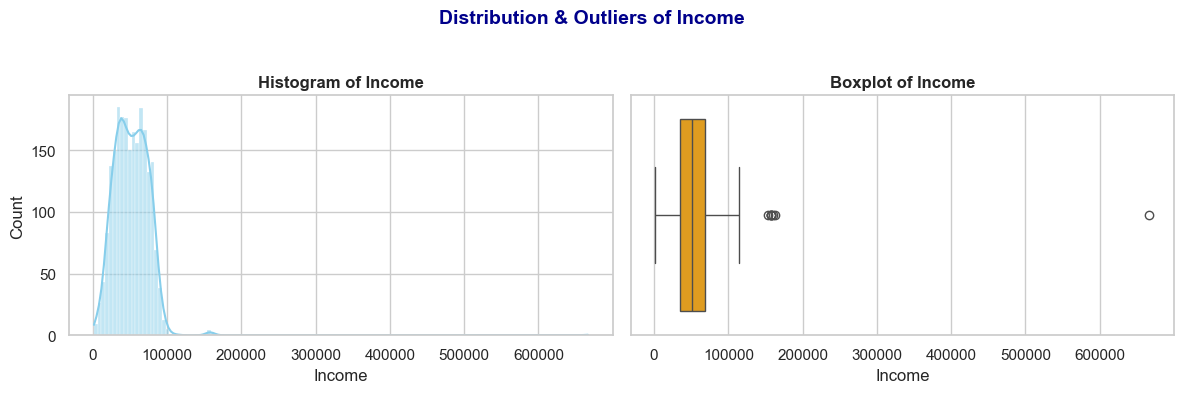

In [134]:
# Cek apakah kolom Income ada di dataframe
if 'Income' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram + KDE
    sns.histplot(data=df, x='Income', kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title('Histogram of Income', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Income')
    axes[0].set_ylabel('Count')

    # Boxplot
    sns.boxplot(data=df, x='Income', color='orange', ax=axes[1])
    axes[1].set_title('Boxplot of Income', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Income')

    plt.suptitle('Distribution & Outliers of Income', fontsize=14, fontweight='bold', color='darkblue')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print("Kolom 'Income' tidak ditemukan di DataFrame.")

In [129]:
# Melihat data outlier Income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR
outliers = df[(df['Income'] < outlier_threshold_low) | (df['Income'] > outlier_threshold_high)]
outliers['Income']

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2131    156924.0
2229    666666.0
Name: Income, dtype: float64

In [150]:
# Uji normalitas pada kolom 'Income'
stat, p = normaltest(df['Income'])
print(f"Statistic: {stat}, p-value: {p}")
if p > 0.05:
    print("Data berdistribusi normal.")
else:
    print("Data tidak berdistribusi normal.")

Statistic: 2938.4696538520575, p-value: 0.0
Data tidak berdistribusi normal.


**TEMUAN**<br>

1. Distribusi Income menunjukkan pola right-skewed (miring ke kanan), di mana sebagian besar pelanggan memiliki pendapatan pada kisaran rendah hingga menengah, dan sebagian kecil memiliki pendapatan yang jauh lebih tinggi.<br>

2. Berdasarkan boxplot, ditemukan adanya outlier ekstrem — yaitu nilai pendapatan yang secara signifikan lebih tinggi dibanding mayoritas populasi.<br>

3. Perhitungan menggunakan metode IQR mengonfirmasi bahwa sejumlah nilai Income berada di atas batas atas (upper bound), mengindikasikan keberadaan pelanggan dengan penghasilan tinggi yang tergolong outlier secara statistik.<br>

4. Nilai p-value= 0.0 (di bawah 0.05) menunjukkan bahwa data Income secara statistik tidak berdistribusi normal.
Ini berarti distribusi Income menyimpang secara signifikan dari distribusi normal, kemungkinan besar disebabkan oleh: <br><br>
    *-. Skewness (kemiringan) ke kanan (positif)*
    *-. Outlier atau nilai ekstrem yang memengaruhi penyebaran data*<br>

5. Catatan penting: Outlier pada kolom Income tidak serta merta berarti kesalahan data.<br>

6. Outlier ini kemungkinan merupakan pelanggan VIP atau high-value customers.

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [138]:
# Membuat deskripsi data yang lebih rapi
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

# Menampilkan hasil
print(f"Jumlah baris dan kolom di dataset dfclean adalah {df.shape}")
dfDesc

(2212, 29)
Jumlah baris dan kolom di dataset dfclean adalah (2212, 29)


,dataFeatures,dataType,null,unique,uniqueSample
0,index,int64,0,2212,"[1114, 858]"
1,ID,int64,0,2212,"[1165, 749]"
2,Dt_Customer,datetime64[ns],0,662,"[2013-01-02T00:00:00.000000000, 2012-12-18T00:00:00.000000000]"
3,Age,int64,0,61,"[32, 114]"
4,Year_Birth,int64,0,59,"[1968, 1952]"
5,Education,object,0,4,"[Basic, PhD]"
6,Marital_Status,object,0,5,"[Together, Divorced]"
7,Kidhome,int64,0,3,"[0, 2]"
8,Teenhome,int64,0,3,"[2, 1]"
9,Income,float64,0,1973,"[54803.0, 37085.0]"


# 3. Data Analysis



## 3.1. Kategori produk paling banyak dibeli pelanggan dalam dua tahun terakhir

Setelah menyelesaikan tahap data cleaning, langkah selanjutnya adalah melakukan analisis untuk memahami karakteristik pelanggan, dengan fokus utama pada pertanyaan:
**“Kategori produk apa yang paling banyak dibeli pelanggan dalam dua tahun terakhir?”**

Analisis ini akan mengevaluasi total pembelian pelanggan pada berbagai kategori produk, seperti wine, buah, daging, ikan, dan produk manis, guna mengidentifikasi kategori yang paling diminati.

In [141]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Total pembelian untuk setiap kategori produk
product_totals = df[product_columns].sum().sort_values(ascending=False)
print(product_totals)

MntWines            674728
MntMeatProducts     369338
MntGoldProds         96935
MntFishProducts      82986
MntSweetProducts     59829
MntFruits            58230
dtype: int64


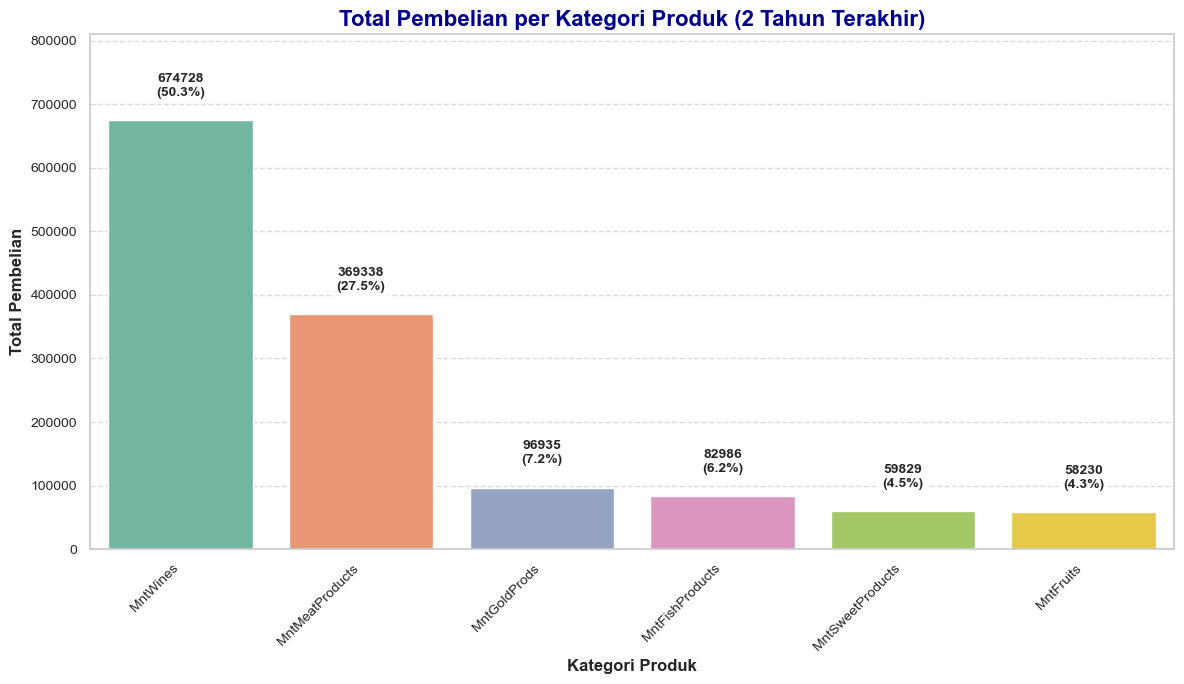

In [177]:
plt.figure(figsize=(12, 7))
barplot = sns.barplot(x=product_totals.index, y=product_totals.values, palette='Set2')

# Judul dan label sumbu
plt.title('Total Pembelian per Kategori Produk (2 Tahun Terakhir)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Kategori Produk', fontsize=12, fontweight='bold')
plt.ylabel('Total Pembelian', fontsize=12, fontweight='bold')

# Putar label x agar mudah dibaca
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Tambahkan grid garis horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hitung total untuk persen dan batas y
total = product_totals.sum()
y_max = product_totals.max()
plt.ylim(0, y_max + y_max * 0.2)  # Tambah ruang di atas

# Tambahkan angka dan persentase di atas bar
for index, value in enumerate(product_totals.values):
    percent = f"{100 * value / total:.1f}%"
    label = f"{int(value)}\n({percent})"
    plt.text(index, value + y_max * 0.05, label,
             ha='center', va='bottom', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.8))  # Latar putih transparan

# Atur layout agar rapi
plt.tight_layout()
plt.show()

**Insight dari Total Pembelian Produk Selama 2 Tahun Terakhir**
1. Kategori Produk Paling Banyak Dibeli
    Produk dengan total pembelian tertinggi adalah Wine (MntWines) dengan total pembelian sebesar 680,816.
Ini menunjukkan bahwa pelanggan memiliki preferensi yang sangat tinggi terhadap produk wine dibandingkan kategori lainnya.

2. Kategori Produk dengan Pembelian Terendah
    Produk dengan total pembelian terendah adalah Fruits (MntFruits) sebesar 58,917.
Hal ini mengindikasikan bahwa produk buah kurang menarik bagi pelanggan dibandingkan kategori lainnya.

3. Distribusi Pembelian Produk
    Setelah Wine, kategori dengan pembelian tertinggi berikutnya adalah:
        Meat Products (MntMeatProducts): 373,968
        Gold Products (MntGoldProds): 98,609
        Fish Products (MntFishProducts): 84,057
        Sweet Products (MntSweetProducts): 60,621
Ini menunjukkan bahwa selain wine, daging juga merupakan produk yang populer di kalangan pelanggan.

4. Perbedaan Signifikan antar Kategori
    Terdapat perbedaan yang sangat mencolok antara Wine dengan kategori lainnya, baik dari sisi jumlah maupun preferensi.
**Hal ini bisa menjadi dasar untuk menyusun strategi pemasaran yang lebih fokus pada produk unggulan.**

5. Peluang untuk Meningkatkan Penjualan
    Kategori dengan pembelian rendah, seperti Fruits dan Sweet Products, bisa menjadi target kampanye pemasaran yang lebih agresif.
Perusahaan dapat menawarkan diskon, bundling produk, atau promosi musiman untuk meningkatkan daya tarik kategori ini.

## 3.2. Profil pelanggan utama dari setiap kategori produk

Customer Profile 

Menganalisis profil pelanggan utama dari setiap kategori produk, dengan memperhatikan faktor seperti usia, gender, status keluarga, dan tingkat pendapatan.

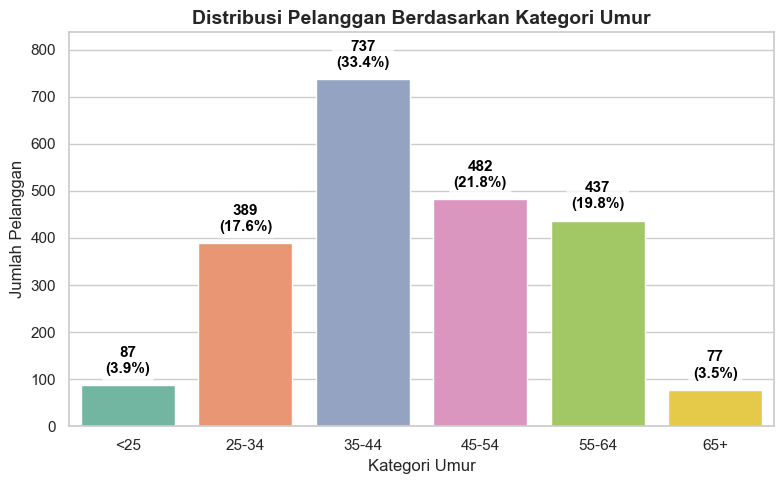

In [173]:
# Membuat kategori umur
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Hitung distribusi
age_counts = df['AgeGroup'].value_counts().sort_index()
total = age_counts.sum()

# Plot
plt.figure(figsize=(8,5))
ax = sns.countplot(x='AgeGroup', data=df, palette='Set2', order=labels)

# Tambah label di atas bar
for p in ax.patches:
    count = int(p.get_height())
    percent = f"{100 * count / total:.1f}%"
    text = f'{count}\n({percent})'
    ax.annotate(text,
                (p.get_x() + p.get_width() / 2., p.get_height() + 20),  # Tambah jarak vertikal lebih besar
                ha='center', va='bottom',
                fontsize=11, color='black', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.8))

# Atur batas sumbu-y agar tidak mepet
y_max = df['AgeGroup'].value_counts().max()
plt.ylim(0, y_max + 100)

plt.title('Distribusi Pelanggan Berdasarkan Kategori Umur', fontsize=14, fontweight='bold')
plt.xlabel('Kategori Umur', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.tight_layout()
plt.show()

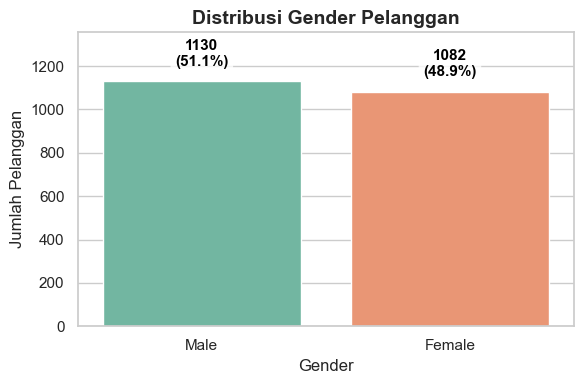

In [175]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', data=df, palette='Set2')

plt.title('Distribusi Gender Pelanggan', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Total pelanggan
total = len(df)

# Hitung batas atas tertinggi untuk memperluas sumbu Y
y_max = df['Gender'].value_counts().max()
plt.ylim(0, y_max + y_max * 0.2)  # Tambah 20% ruang di atas

# Tambahkan angka dan persentase di atas bar
for p in ax.patches:
    count = int(p.get_height())
    percent = f"{100 * count / total:.1f}%"
    text = f"{count}\n({percent})"
    ax.annotate(text, 
                (p.get_x() + p.get_width() / 2, p.get_height() + y_max * 0.05),  
                ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='black',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.8))  

plt.tight_layout()
plt.show()

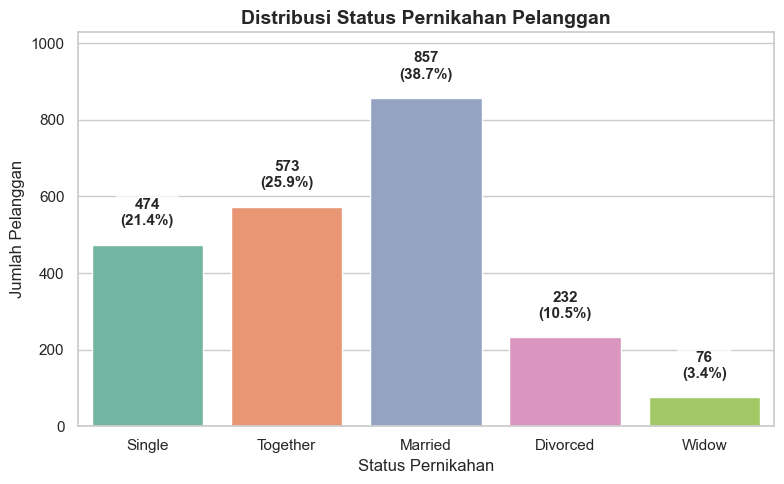

In [176]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Marital_Status', data=df, palette='Set2')
plt.title('Distribusi Status Pernikahan Pelanggan', fontsize=14, fontweight='bold')
plt.xlabel('Status Pernikahan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Hitung total dan maksimum untuk mengatur batas sumbu y
total = len(df)
y_max = df['Marital_Status'].value_counts().max()
plt.ylim(0, y_max + y_max * 0.2)  

# Tambahkan jumlah dan persentase di atas setiap bar
for p in ax.patches:
    count = int(p.get_height())
    percent = f"{100 * count / total:.1f}%"
    text = f"{count}\n({percent})"
    ax.annotate(text, 
                (p.get_x() + p.get_width() / 2, p.get_height() + y_max * 0.05),  
                ha='center', va='bottom', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.8))  

plt.tight_layout()
plt.show()

In [169]:
# Buat DataFrame dari income_labels dan income_counts
income_table = pd.DataFrame({
    'Income Range': ['0–35K', '35K–60K', '60K–90K', f'>90K–{int(df["Income"].max()):,}'],
    'Category': income_labels,
    'Customer Count': income_counts.values
})

# Tampilkan tabel
print(income_table)

   Income Range   Category  Customer Count
0         0–35K        Low             549
1       35K–60K     Medium             824
2       60K–90K       High             786
3  >90K–666,666  Very High              53


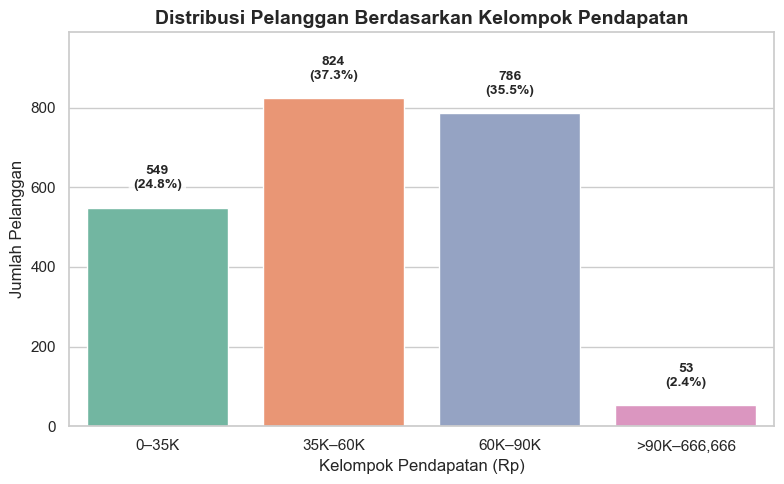

In [178]:
# Label manual untuk rentang pendapatan
income_ranges = [
    '0–35K',
    '35K–60K',
    '60K–90K',
    f'>90K–{int(df["Income"].max()):,}'
]

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x=income_ranges, y=income_counts.values, palette='Set2')
plt.title('Distribusi Pelanggan Berdasarkan Kelompok Pendapatan', fontsize=14, fontweight='bold')
plt.xlabel('Kelompok Pendapatan (Rp)', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Total dan batas atas
total = income_counts.sum()
y_max = income_counts.max()
plt.ylim(0, y_max + y_max * 0.2)  

# Tambahkan label jumlah dan persentase
for i, value in enumerate(income_counts.values):
    percent = f"{100 * value / total:.1f}%"
    text = f"{value}\n({percent})"
    plt.text(i, value + y_max * 0.05, text,
             ha='center', va='bottom', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.8))  

plt.tight_layout()
plt.show()

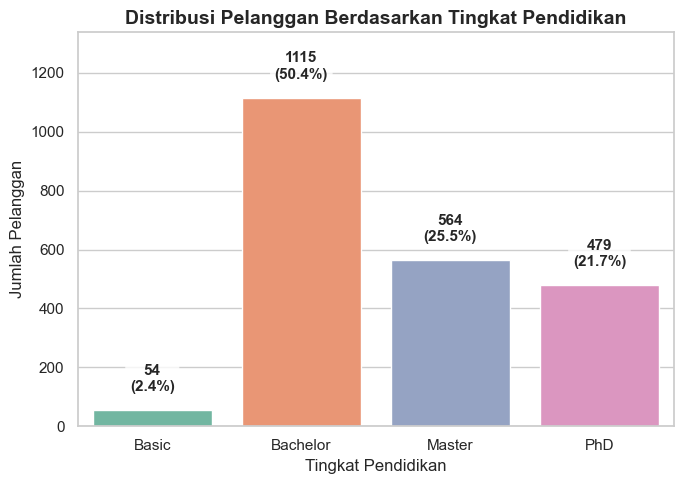

In [180]:
# Buat kelompok pendidikan
education_map = {
    'Basic': 'Basic',
    'Bachelor': 'Bachelor',
    'Master': 'Master',
    'PhD': 'PhD'
}
df['EducationGroup'] = df['Education'].map(education_map)

# Visualisasi
plt.figure(figsize=(7,5))
ax = sns.countplot(x='EducationGroup', data=df, palette='Set2', order=['Basic', 'Bachelor', 'Master', 'PhD'])

# Judul dan label
plt.title('Distribusi Pelanggan Berdasarkan Tingkat Pendidikan', fontsize=14, fontweight='bold')
plt.xlabel('Tingkat Pendidikan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Hitung total dan nilai maksimum
total = len(df)
y_max = df['EducationGroup'].value_counts().max()
plt.ylim(0, y_max + y_max * 0.2)  

# Tambahkan jumlah dan persentase di atas bar
for p in ax.patches:
    count = int(p.get_height())
    percent = f"{100 * count / total:.1f}%"
    label = f"{count}\n({percent})"
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2, p.get_height() + y_max * 0.05),
                ha='center', va='bottom', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## 📊 Ringkasan Temuan Data Pelanggan

### 🎯 Profil Pelanggan Dominan
- **Usia:** 35–44 tahun (**33.4%**)
- **Gender:** Laki-laki dan perempuan hampir seimbang
- **Status Pernikahan:** Mayoritas **menikah (38.7%)**
- **Pendapatan:** Terbanyak di rentang **35K–90K**
- **Pendidikan:** Mayoritas berpendidikan **Bachelor (50.4%)**

## **DISTRIBUSI PEMBELIAN PRODUK BERDASARKAN UMUR DAN STATUS KELUARGA**

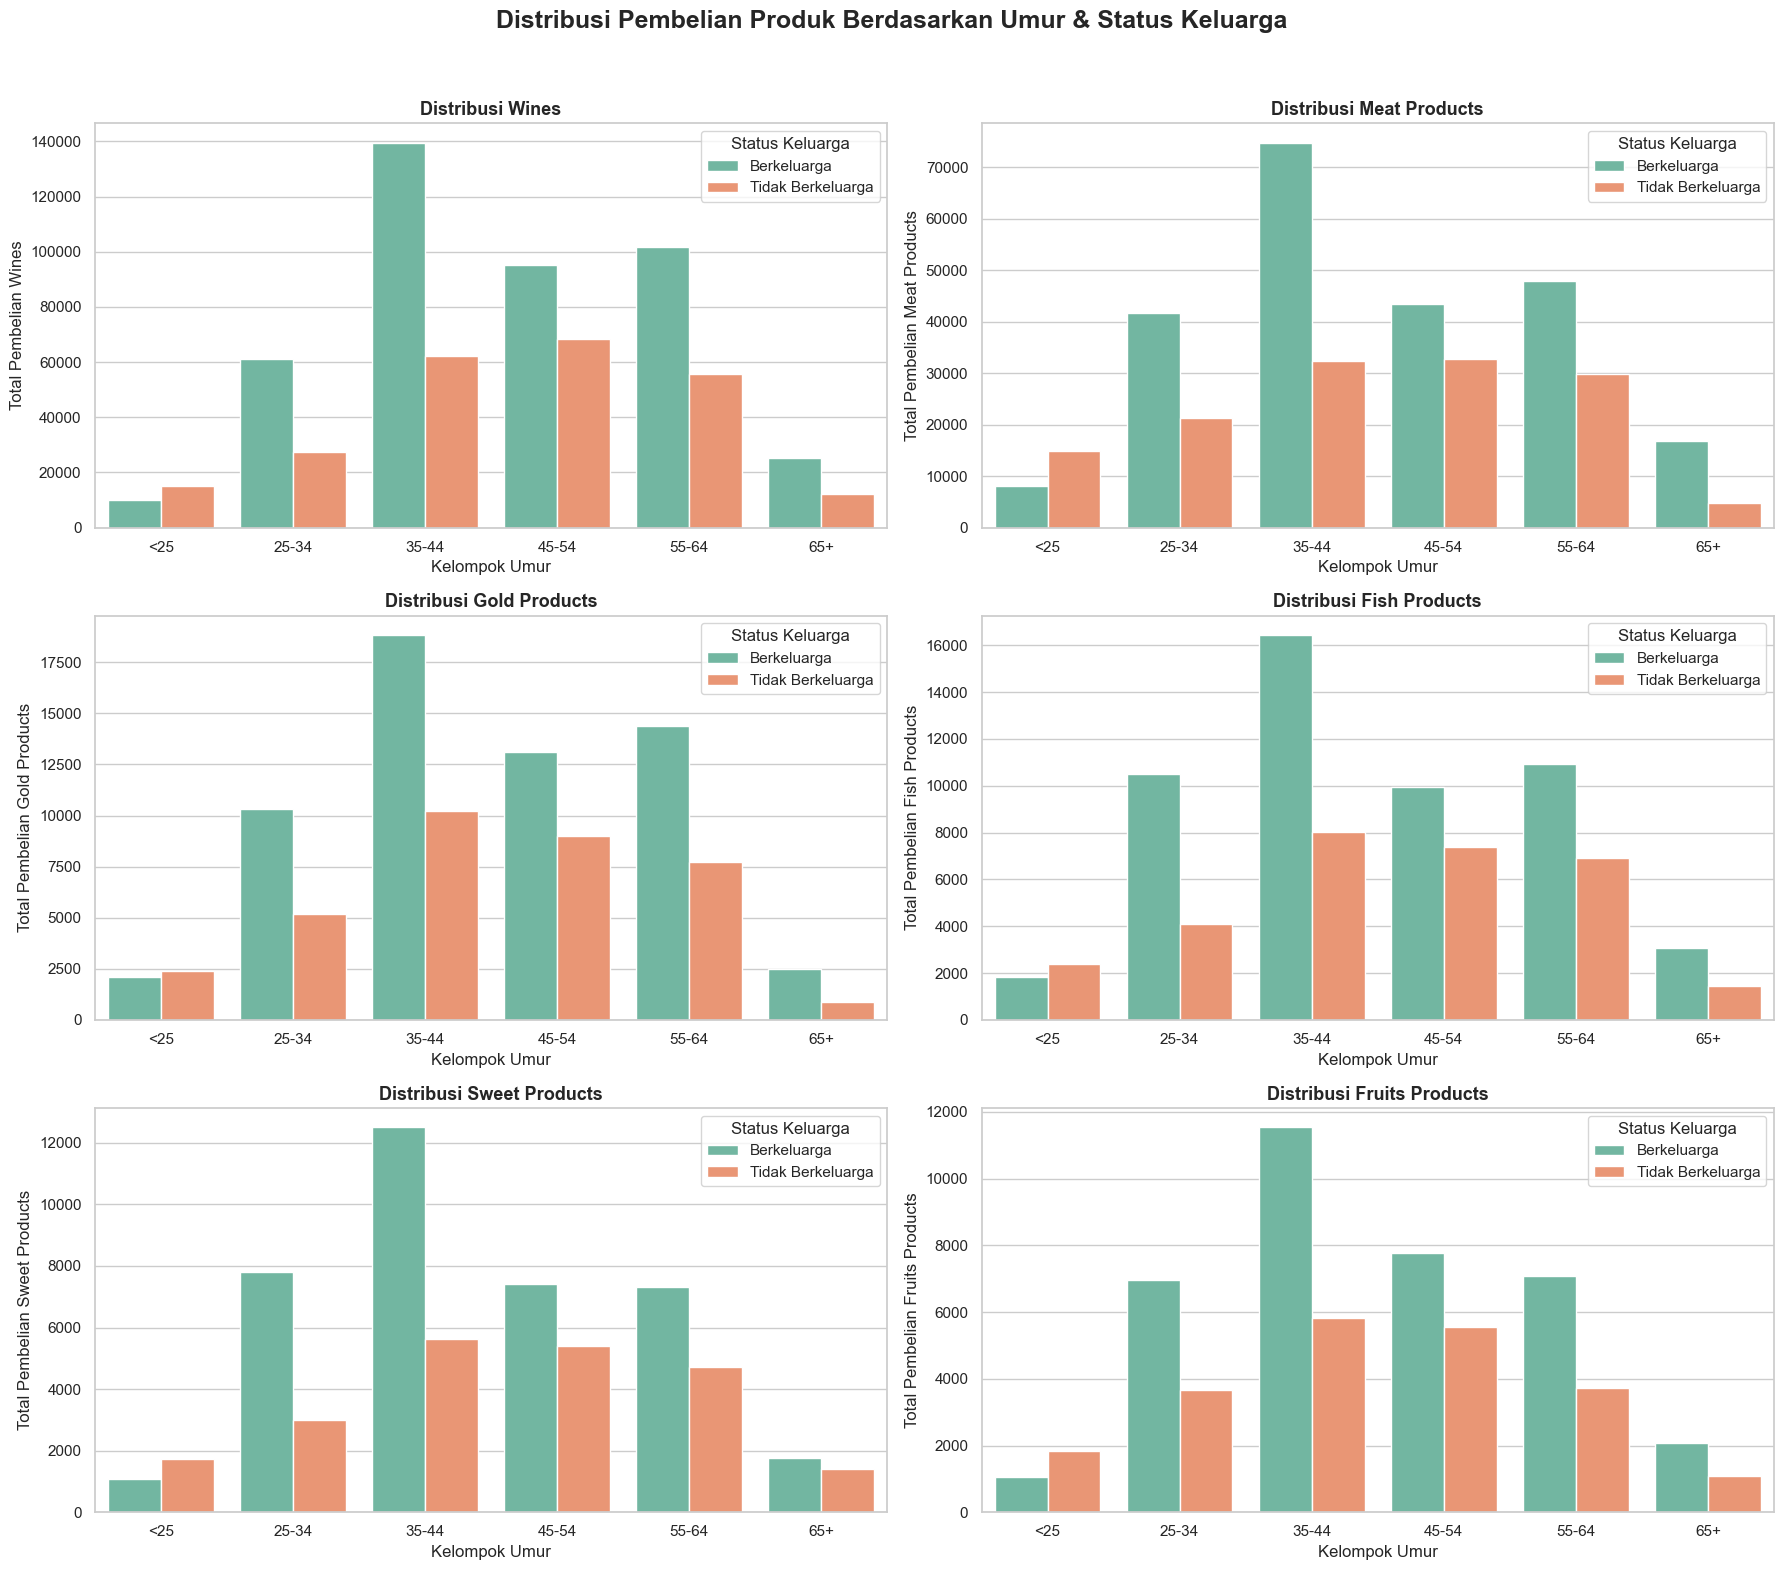

In [256]:
# Berdasarkan Umur dan Status Keluarga

# Daftar produk dan label
produk_list = [
    ('MntWines', 'Wines'),
    ('MntMeatProducts', 'Meat Products'),
    ('MntGoldProds', 'Gold Products'),
    ('MntFishProducts', 'Fish Products'),
    ('MntSweetProducts', 'Sweet Products'),
    ('MntFruits', 'Fruits Products')
]

fig, axes = plt.subplots(3, 2, figsize=(18, 16), sharey=False)
axes = axes.flatten()

for i, (prod_col, prod_label) in enumerate(produk_list):
    data = df.groupby(['AgeGroup', 'FamilyStatusGroup'], observed=True)[prod_col].sum().reset_index()
    sns.barplot(
        data=data,
        x='AgeGroup', y=prod_col, hue='FamilyStatusGroup',
        ci=None, palette='Set2', ax=axes[i]
    )
    axes[i].set_title(f'Distribusi {prod_label}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Kelompok Umur')
    axes[i].set_ylabel(f'Total Pembelian {prod_label}')
    axes[i].legend(title='Status Keluarga')

plt.suptitle('Distribusi Pembelian Produk Berdasarkan Umur & Status Keluarga', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## **Temuan**

### 1. Kelompok Usia 35–44 Tahun Mendominasi Pembelian
Pada hampir semua jenis produk (*Wines, Meat, Fish, Sweet, Fruits, dan Gold*), kelompok umur **35–44 tahun yang sudah berkeluarga** memiliki tingkat pembelian tertinggi.  
👉 Ini menunjukkan bahwa **keluarga usia produktif** adalah segmen konsumen paling bernilai.

---

### 2. Status Keluarga Berpengaruh Signifikan
Pada setiap kategori produk, pelanggan **yang sudah berkeluarga** memiliki pembelian yang **jauh lebih tinggi** dibanding yang tidak berkeluarga, khususnya di usia **35–64 tahun**.  
👉 Pelanggan tidak berkeluarga relatif konsisten di angka yang lebih rendah, menandakan **perbedaan gaya hidup/kebutuhan**.

---

### 3. Penurunan pada Usia 65+
Terdapat **penurunan signifikan** dalam pembelian di usia **65+**, baik untuk pelanggan yang berkeluarga maupun tidak.  
👉 Kemungkinan karena **perubahan kebutuhan, pendapatan, atau gaya hidup setelah pensiun**.

---

### 4. Produk Wine dan Meat Paling Populer
Total pembelian **Wine** dan **Meat** jauh lebih tinggi dibanding produk lainnya.  
👉 Menandakan bahwa kedua kategori ini menjadi **produk inti dalam konsumsi rumah tangga**.

---

### 5. Produk Non-Essential seperti Gold & Sweet Juga Signifikan
Meskipun nilainya lebih kecil dibanding Wine dan Meat, pembelian **Gold dan Sweet Products** juga cukup tinggi, terutama di kelompok usia **35–54 tahun**.  
👉 Ini mengindikasikan adanya potensi untuk **cross-selling atau promosi produk tambahan**.

---

### 6. Pola Konsisten Antara Produk
Semua produk menunjukkan pola distribusi yang hampir sama: **puncak di usia 35–44**, lalu menurun.  
👉 Ini menyiratkan bahwa **strategi pemasaran bisa diseragamkan** dengan sedikit penyesuaian untuk masing-masing produk.

## **DISTRIBUSI PEMBELIAN PRODUK BERDASARKAN UMUR DAN PENDIDIKAN**

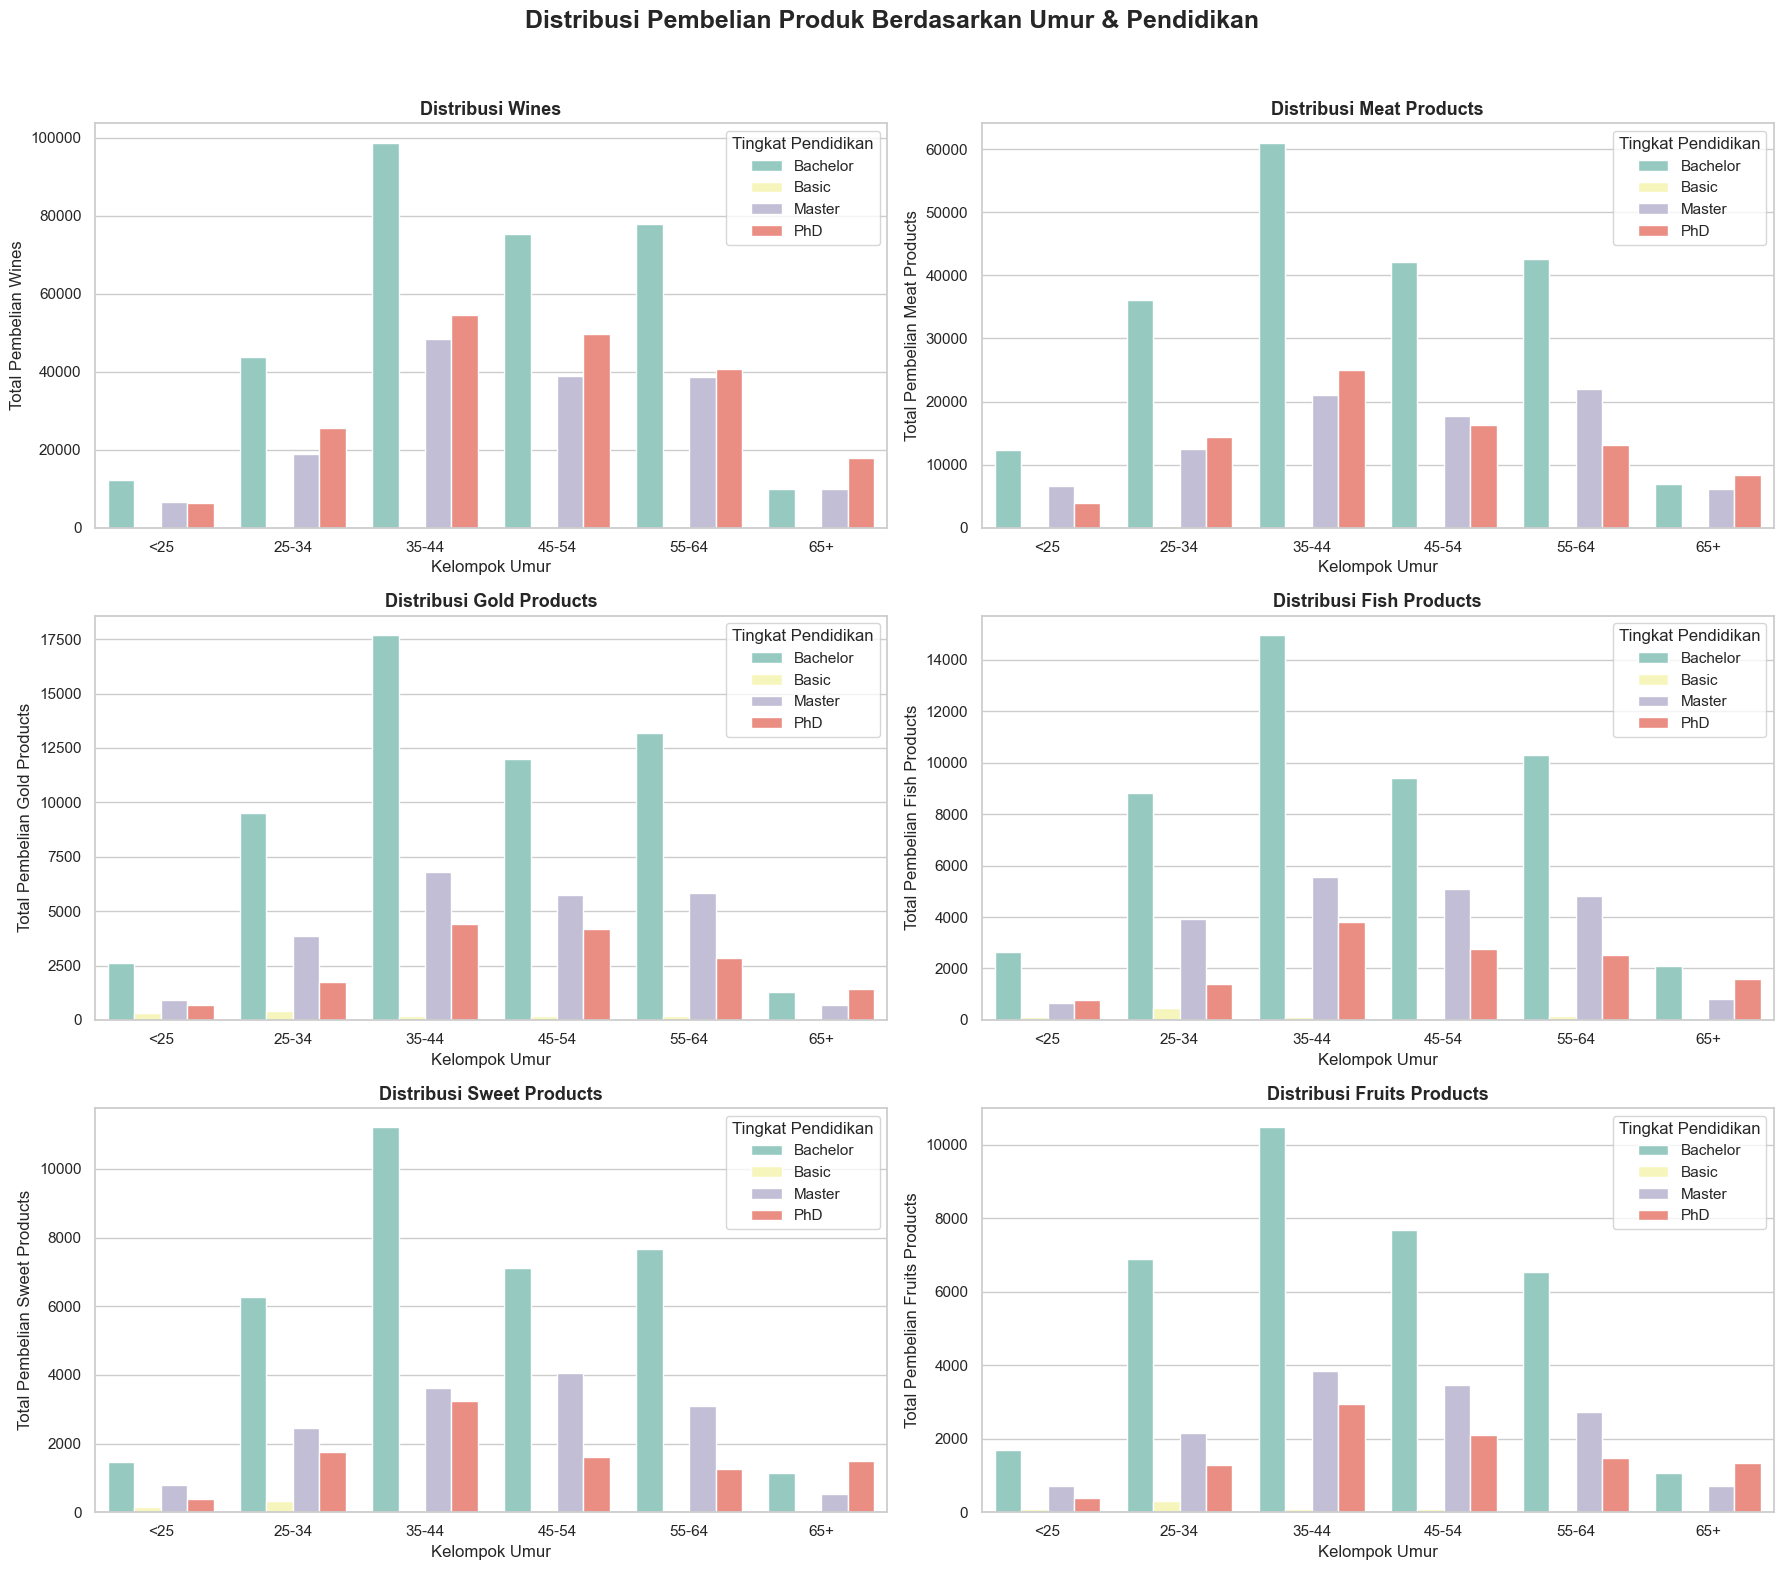

In [254]:
# Berdasarkan Umur dan Pendidikan

# Daftar produk dan label

produk_list = [
    ('MntWines', 'Wines'),
    ('MntMeatProducts', 'Meat Products'),
    ('MntGoldProds', 'Gold Products'),
    ('MntFishProducts', 'Fish Products'),
    ('MntSweetProducts', 'Sweet Products'),
    ('MntFruits', 'Fruits Products')
]

# Membuat plot
fig, axes = plt.subplots(3, 2, figsize=(18, 16), sharey=False)
axes = axes.flatten()

for i, (prod_col, prod_label) in enumerate(produk_list):
    data = df.groupby(['AgeGroup', 'Education'], observed=True)[prod_col].sum().reset_index()
    sns.barplot(
        data=data,
        x='AgeGroup', y=prod_col, hue='Education',
        ci=None, palette='Set3', ax=axes[i]
    )
    axes[i].set_title(f'Distribusi {prod_label}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Kelompok Umur')
    axes[i].set_ylabel(f'Total Pembelian {prod_label}')
    axes[i].legend(title='Tingkat Pendidikan')

plt.suptitle('Distribusi Pembelian Produk Berdasarkan Umur & Pendidikan', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 📊 Temuan: Distribusi Pembelian Produk Berdasarkan Umur & Pendidikan

### 1. 🎓 Pendidikan Sarjana (Bachelor) Mendominasi
- Di semua kelompok umur dan jenis produk, pelanggan dengan tingkat pendidikan **Bachelor** memiliki total pembelian tertinggi.
- Ini menunjukkan bahwa mereka adalah segmen yang paling potensial secara ekonomi dan konsumsi.

### 2. 📈 Usia 35–44 Tahun = Usia Konsumtif
- Kelompok umur **35–44 tahun** consistently menjadi puncak pembelian di hampir semua kategori produk.
- Terutama bagi pelanggan dengan gelar Bachelor dan Master.

### 3. 🧁 Produk Sekunder (Sweet & Gold Products) Diminati Pendidikan Tinggi
- Pelanggan dengan pendidikan **Master** dan **PhD** juga aktif membeli produk seperti **Sweet**, **Gold**, dan **Fruits** — meskipun jumlahnya lebih kecil.
- Ini bisa dimanfaatkan untuk strategi promosi produk premium atau eksklusif.

### 4. 🔻 Usia 65+ Mengalami Penurunan
- Semua tingkat pendidikan menunjukkan **penurunan pembelian signifikan** di usia 65+.
- Ini bisa disebabkan oleh menurunnya pendapatan atau kebutuhan konsumsi yang lebih rendah pasca pensiun.


## **DISTRIBUSI PEMBELIAN PRODUK BERDASARKAN UMUR DAN STATUS PENDAPATAN**

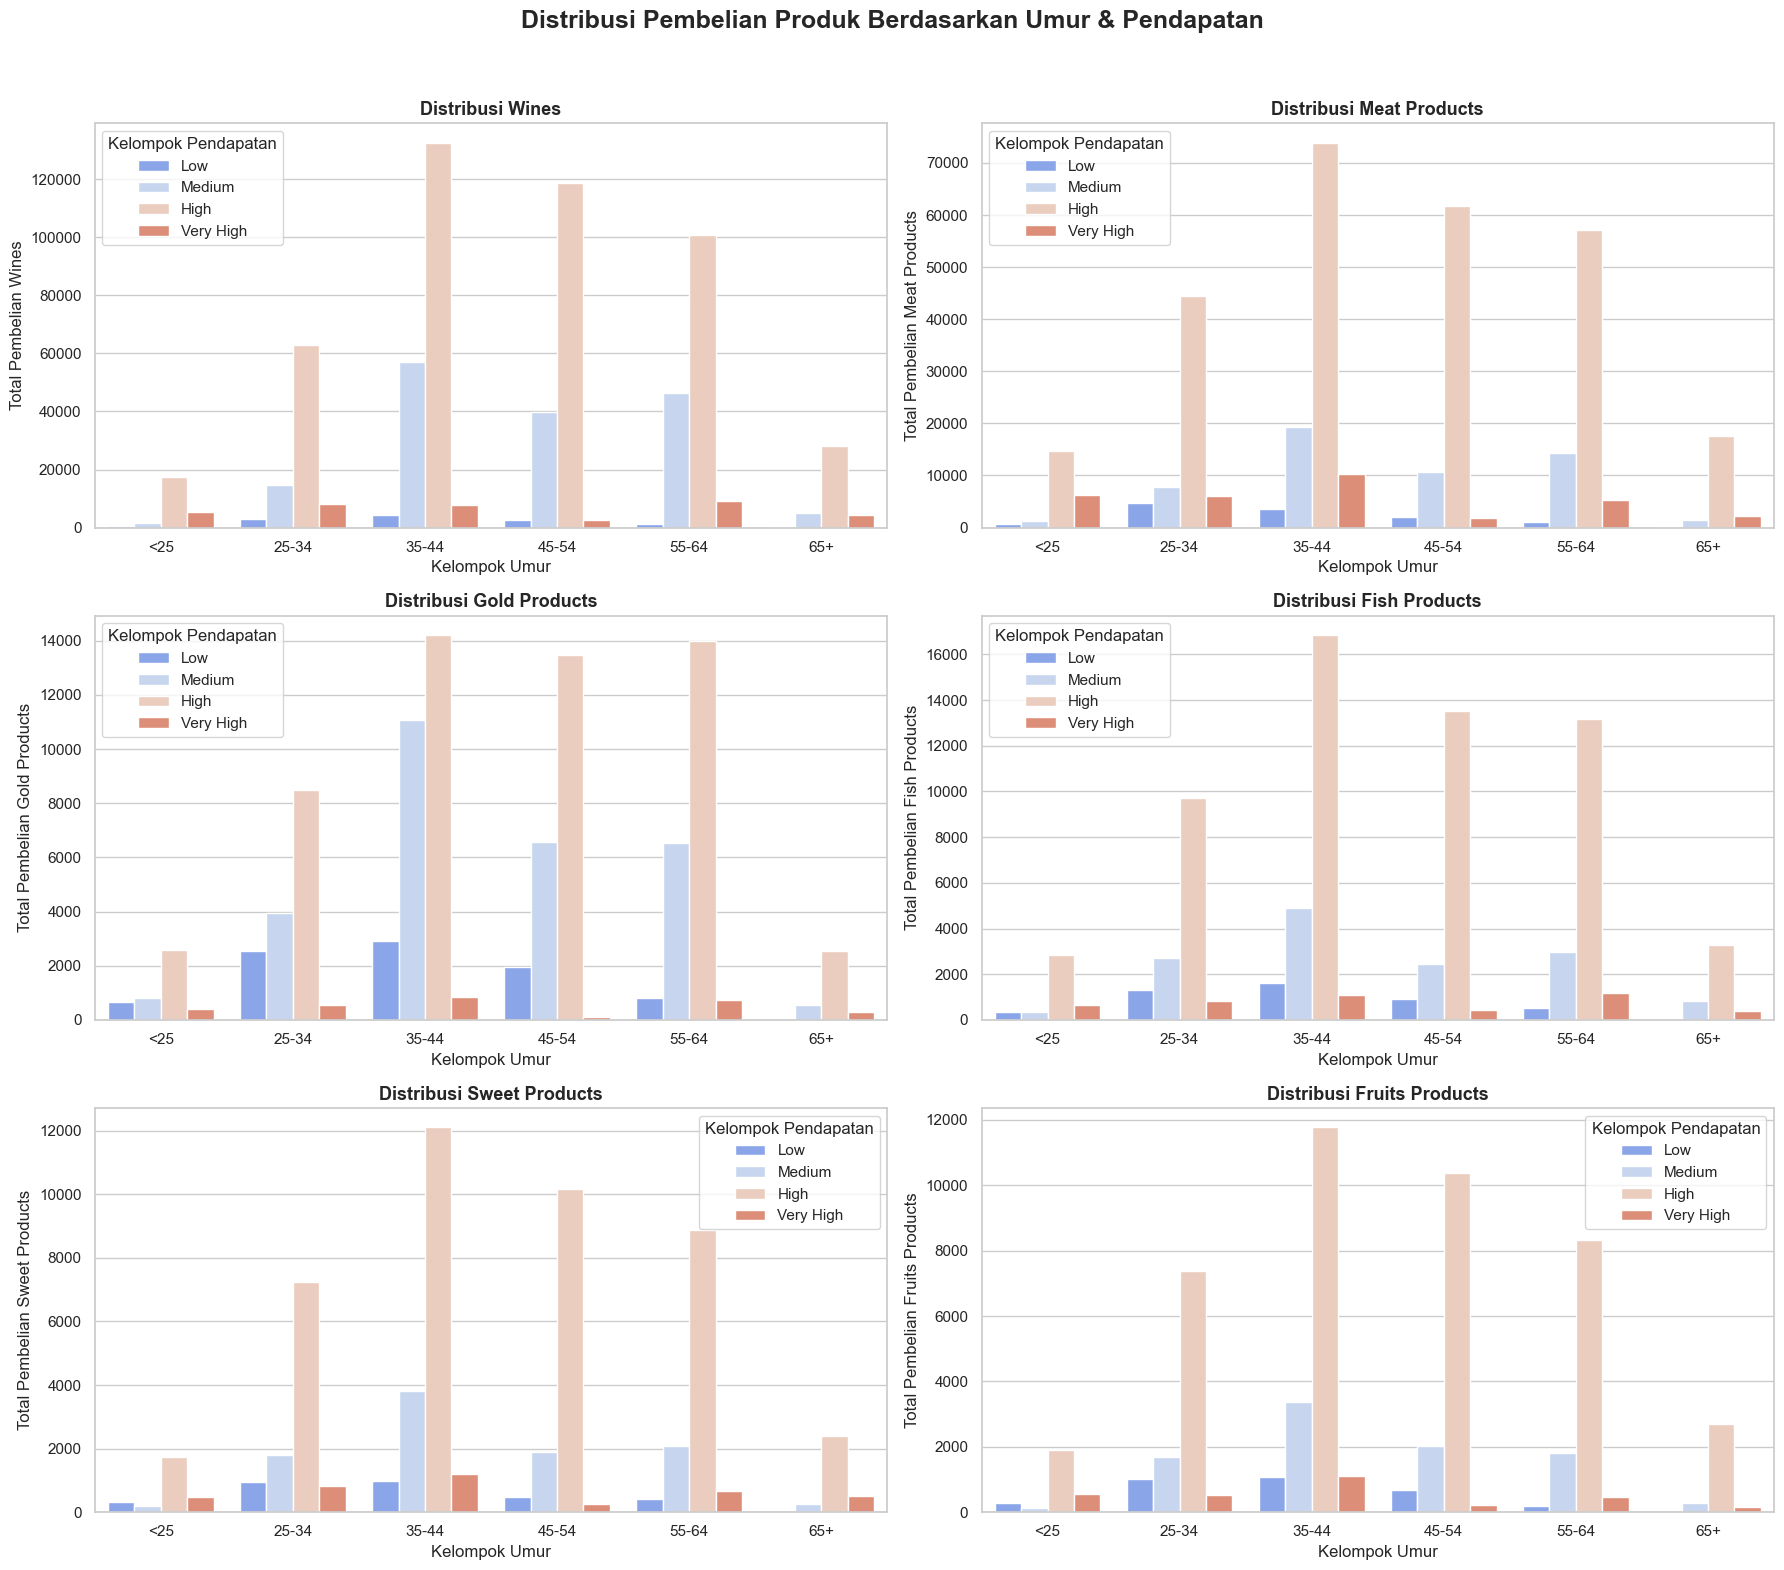

In [ ]:
# Berdasarkan Umur dan Pendapatan

# Daftar produk dan label
produk_list = [
    ('MntWines', 'Wines'),
    ('MntMeatProducts', 'Meat Products'),
    ('MntGoldProds', 'Gold Products'),
    ('MntFishProducts', 'Fish Products'),
    ('MntSweetProducts', 'Sweet Products'),
    ('MntFruits', 'Fruits Products')
]

# Membuat plot
fig, axes = plt.subplots(3, 2, figsize=(18, 16), sharey=False)
axes = axes.flatten()

for i, (prod_col, prod_label) in enumerate(produk_list):
    data = df.groupby(['AgeGroup', 'IncomeGroup'], observed=True)[prod_col].sum().reset_index()
    sns.barplot(
        data=data,
        x='AgeGroup', y=prod_col, hue='IncomeGroup',
        ci=None, palette='coolwarm', ax=axes[i]
    )
    axes[i].set_title(f'Distribusi {prod_label}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Kelompok Umur')
    axes[i].set_ylabel(f'Total Pembelian {prod_label}')
    axes[i].legend(title='Kelompok Pendapatan')

plt.suptitle('Distribusi Pembelian Produk Berdasarkan Umur & Pendapatan', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 💰 Temuan: Distribusi Pembelian Produk Berdasarkan Umur & Pendapatan

### 1. 🟫 Segmen "High Income" Mendominasi Semua Kategori
- Konsumen dengan pendapatan **High** mendominasi pembelian di semua kategori produk.
- Mereka menjadi **segmen utama yang paling bernilai** secara komersial, terutama dalam usia produktif (25–64 tahun).

### 2. 📊 Usia 35–44 = Titik Konsumsi Tertinggi
- Seperti pola sebelumnya, kelompok usia **35–44 tahun** menjadi puncak pembelian di hampir semua kategori.
- Terutama oleh kelompok pendapatan **Very High** dan **High**.

### 3. 📉 Kategori Low & Medium Income Relatif Rendah
- Total pembelian dari kelompok pendapatan **Low** dan **Medium** jauh lebih rendah.
- Artinya, strategi penjualan massal mungkin kurang efektif, lebih cocok menyasar segmen premium.

### 4. 🥩 Produk Inti: Meat & Wine
- Produk **Meat** dan **Wine** mencatat volume pembelian tertinggi di semua tingkat pendapatan, terutama di segmen High.
- Kategori ini bisa difokuskan untuk program loyalitas atau bundling eksklusif.

### 5. 🧁 Produk Sekunder Masih Diminati
- Meskipun nilainya lebih kecil, **Gold**, **Sweet**, dan **Fruits** tetap dikonsumsi cukup signifikan, terutama oleh kelompok pendapatan tinggi.
- Ini memberikan peluang untuk strategi **cross-selling**.

### 6. 👵 Usia 65+ Menunjukkan Penurunan
- Konsumen usia 65+ cenderung menurun drastis dalam semua tingkat pendapatan.
- Bisa dikaitkan dengan pengurangan daya beli dan perubahan gaya hidup pasca pensiun.


## 3.3. Saluran pembelian masing-masing produk

Menentukan saluran pembelian yang paling efektif untuk masing-masing kategori produk.

In [269]:
# Menampilkan saluran pembelian untuk masing-masing produk

# Ambil produk Wine, Meat, Gold
prioritas = ['Wine', 'Meat', 'Gold']
rekap_prioritas = rekap_df[rekap_df['Produk'].isin(prioritas)]

# Produk lain di luar prioritas, urutkan berdasarkan Store terbanyak
rekap_lain = rekap_df[~rekap_df['Produk'].isin(prioritas)].sort_values(by='Store', ascending=False)

# Gabungkan: prioritas dulu, lalu produk lain
rekap_final = pd.concat([rekap_prioritas, rekap_lain], ignore_index=True)

# Tampilkan hasil
print(rekap_final[['Produk', 'Web', 'Catalog', 'Store']])

   Produk   Web  Catalog  Store
0    Wine  9018     5902  12797
1    Meat  9031     5902  12828
2    Gold  8855     5761  12519
3    Fish  7807     5402  11102
4  Fruits  7763     5293  11016
5   Sweet  7659     5282  10969


<Figure size 1000x600 with 0 Axes>

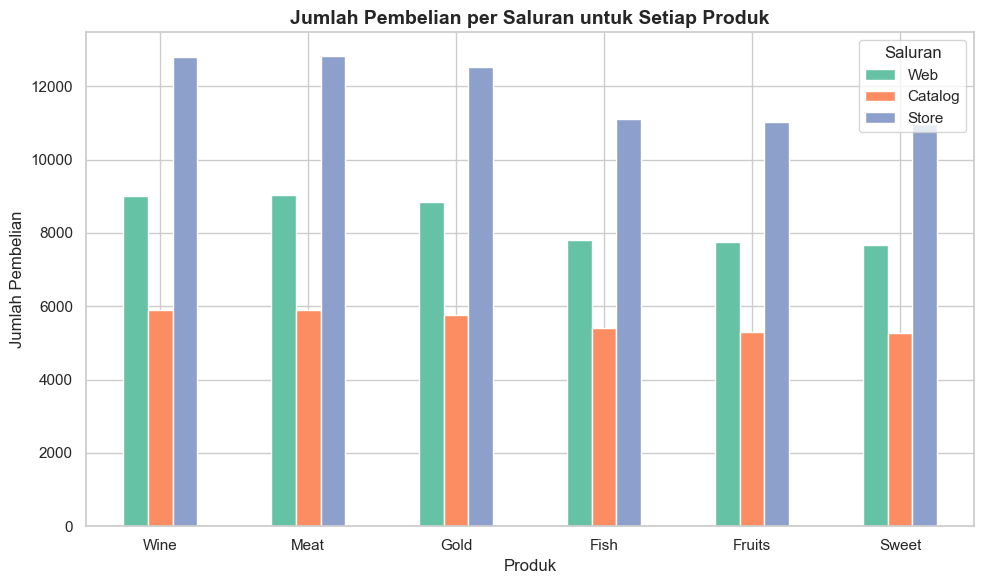

In [ ]:
# Visualisasi rekap saluran pembelian produk
plt.figure(figsize=(10,6))
rekap_final_plot = rekap_final.set_index('Produk')[['Web', 'Catalog', 'Store']]
rekap_final_plot.plot(kind='bar', figsize=(10,6), color=['#66c2a5', '#fc8d62', '#8da0cb'])

plt.title('Jumlah Pembelian per Saluran untuk Setiap Produk', fontsize=14, fontweight='bold')
plt.xlabel('Produk', fontsize=12)
plt.ylabel('Jumlah Pembelian', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Saluran')
plt.tight_layout()
plt.show()

## 3.4 Tingkat respons pelanggan terhadap kampanye promosi pada berbagai kategori produk


            Total Accepted  Response Rate (%)
Campaign 1             141               6.37
Campaign 2              30               1.36
Campaign 3             163               7.37
Campaign 4             164               7.41
Campaign 5             161               7.28
Campaign 6             331              14.96


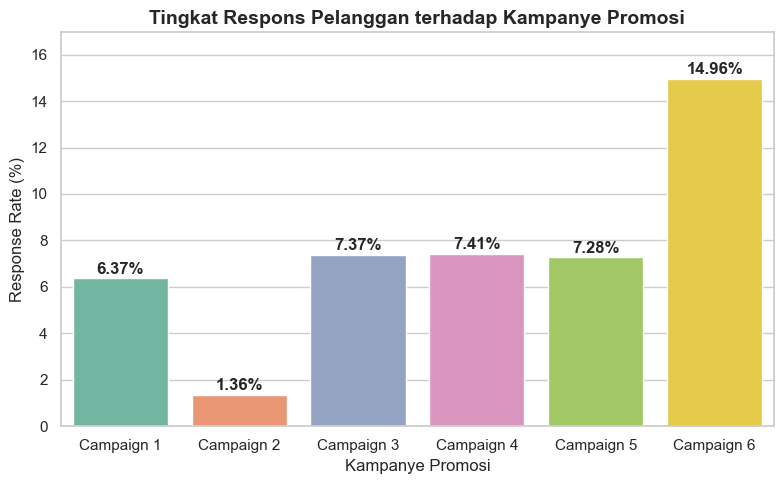

In [243]:

# Daftar kolom accepted campaign
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

# Hitung total pelanggan yang menerima tiap kampanye
campaign_response = df[campaign_cols].sum()

# Hitung persentase respons terhadap total pelanggan
total_customers = len(df)
campaign_response_pct = (campaign_response / total_customers * 100).round(2)

# Gabungkan ke dalam DataFrame
campaign_summary = pd.DataFrame({
    'Total Accepted': campaign_response,
    'Response Rate (%)': campaign_response_pct
})
campaign_summary.index = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6']

# Tampilkan hasil
print(campaign_summary)

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x=campaign_summary.index, y=campaign_summary['Response Rate (%)'], palette='Set2')
plt.title('Tingkat Respons Pelanggan terhadap Kampanye Promosi', fontsize=14, fontweight='bold')
plt.xlabel('Kampanye Promosi', fontsize=12)
plt.ylabel('Response Rate (%)', fontsize=12)
plt.ylim(0, campaign_summary['Response Rate (%)'].max() + 2)
for i, v in enumerate(campaign_summary['Response Rate (%)']):
    plt.text(i, v + 0.2, f"{v}%", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# 📊 Analisis Tingkat Respons Pelanggan terhadap Kampanye Promosi

## 🔢 Tingkat Respons per Kampanye

| Kampanye     | Response Rate (%) |
|--------------|-------------------|
| Campaign 1   | 6.37%             |
| Campaign 2   | 1.36%             |
| Campaign 3   | 7.37%             |
| Campaign 4   | 7.41%             |
| Campaign 5   | 7.28%             |
| **Campaign 6** | **14.96%**         |

---

## 🧠 Temuan 

- **✅ Campaign 6 Paling Efektif**  
  - Tingkat respons **tertinggi** sebesar 14.96%.  
  - Lebih dari dua kali lipat dibandingkan kampanye lain.  
  - Indikasi bahwa segmen target dan pendekatan kampanye sangat tepat.

- **⚠️ Campaign 2 Tidak Efektif**  
  - Hanya 1.36% pelanggan merespons.  
  - Perlu investigasi atas kegagalan strategi (target pasar, media, waktu, dll).

- **📈 Campaign 3, 4, dan 5 Stabil**  
  - Masing-masing memiliki tingkat respons di atas 7%.  
  - Dapat dijadikan acuan baseline efektivitas promosi.

- **🧐 Campaign 1 Kurang Optimal**  
  - 6.37% masih di bawah rata-rata kampanye lainnya.  
  - Perlu perbaikan strategi komunikasi dan segmentasi.

---

## 🎯 Rekomendasi Strategis

- **Analisis Lebih Lanjut Campaign 6**  
  - Identifikasi ciri khas pelanggan yang merespons.  
  - Ulangi pendekatan serupa pada promosi lain.

- **Tinjau Ulang Campaign 2**  
  - Lakukan audit pada pesan, kanal, dan waktu kampanye.  
  - Pertimbangkan A/B Testing untuk meningkatkan efektivitas.

- **Optimalkan Kampanye Stabil (3–5)**  
  - Kampanye ini menunjukkan performa konsisten.  
  - Bisa ditingkatkan dengan sedikit penyesuaian atau personalisasi.

---

# 5. Kesimpulan dan Rekomendasi 

# 📊 Kesimpulan Analisis Data

## 1. Distribusi Pembelian Berdasarkan Umur & Status Keluarga
- Kelompok umur **35–44 tahun** merupakan pembeli terbanyak hampir di semua jenis produk.
- Konsumen **berkeluarga** lebih banyak membeli produk dibanding yang tidak berkeluarga, terutama untuk:
  - Wines
  - Meat Products
  - Gold Products

## 2. Distribusi Berdasarkan Umur & Tingkat Pendidikan
- Konsumen dengan **pendidikan Bachelor** mendominasi pembelian di semua kelompok umur dan semua jenis produk.
- Tingkat pendidikan **Master dan PhD** menunjukkan kontribusi yang cukup besar di usia 35–54, namun tetap lebih rendah dari Bachelor.

## 3. Distribusi Berdasarkan Umur & Pendapatan
- Kelompok dengan **pendapatan High & Very High** memberikan kontribusi terbesar terhadap pembelian di semua produk dan usia.
- Pendapatan rendah dan menengah berkontribusi jauh lebih kecil.

## 4. Distribusi Pembelian Berdasarkan Saluran
- **Store** adalah saluran paling dominan dalam pembelian semua jenis produk.
- **Web** berada di posisi kedua, dan **Catalog** di posisi terbawah.

## 5. Tingkat Respons Kampanye Promosi
- **Campaign 6** memiliki tingkat respons tertinggi (14.96%).
- **Campaign 2** adalah yang paling rendah (1.36%), menunjukkan efektivitas yang sangat buruk.

---

# ✅ Saran Strategis

## 1. Segmentasi & Target Pasar
- Fokuskan strategi pemasaran pada konsumen:
  - Berusia **35–54 tahun**
  - **Berkeluarga**
  - **Berpendapatan tinggi**
  - **Berpendidikan Bachelor**

## 2. Optimalisasi Saluran Distribusi
- Pertahankan dan tingkatkan layanan di **Store** sebagai saluran utama.
- Perkuat strategi pemasaran dan UX di **Web** untuk mendekati performa Store.
- Evaluasi efektivitas saluran **Catalog**, pertimbangkan untuk efisiensi atau inovasi.

## 3. Evaluasi Kampanye Promosi
- Jadikan **Campaign 6** sebagai referensi kampanye sukses.
- Tinjau dan revisi total pendekatan **Campaign 2** karena efektivitas sangat rendah.

## 4. Pengembangan Produk
- Tawarkan produk varian premium/exclusive untuk segmen mapan:
  - Wine
  - Meat
  - Gold
- Pertimbangkan bundling atau loyalty program bagi konsumen top-tier.

---

